In [6]:
import pandas as pd
from sklearn.datasets import load_diabetes

data=load_diabetes()
X=data.data
y=data.target

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)]
)

In [12]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [13]:
history=model.fit(X_train,y_train,
                  validation_split=0.2,
                  epochs=50,
                  batch_size=32)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 31774.1523 - mae: 158.8345 - val_loss: 22367.8574 - val_mae: 133.6665
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30716.4336 - mae: 157.2542 - val_loss: 22257.2910 - val_mae: 133.2743
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31736.3027 - mae: 158.4402 - val_loss: 22119.6172 - val_mae: 132.7978
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29205.5000 - mae: 151.4857 - val_loss: 21944.9922 - val_mae: 132.1966
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 30094.5156 - mae: 154.6102 - val_loss: 21725.6055 - val_mae: 131.4453
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 31570.2910 - mae: 158.2621 - val_loss: 21448.6113 - val_mae: 130.4975
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 28855.2031 - mae: 150.9405 - val_loss: 21104.0801 - val_mae: 129.3157
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29066.6172 - mae: 151.6644 - val_loss: 20676.4004 - va

In [14]:
test_loss, test_mae = model.evaluate(X_test, y_test)
test_loss, test_mae


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3852.3884 - mae: 49.9720


(3616.666748046875, 48.004295349121094)

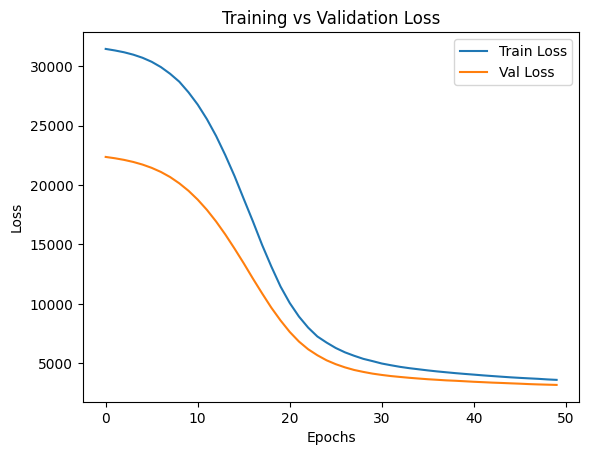

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
